<a href="https://colab.research.google.com/github/manuel1729/Investigacion-de-operaciones/blob/main/Varios_art%C3%ADculos_Investigaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gómez Cruz Manuel**

# **11.2.3 Cantidad económica de pedido de varios artículos con limitación de almacén**

Se aplica al caso con n > 1 artículos cuyo inventario individual fluctúa de acuerdo con la siguiente figura (no se permiten faltantes). La diferencia está en que los
artículos compiten por un espacio limitado de almacenamiento

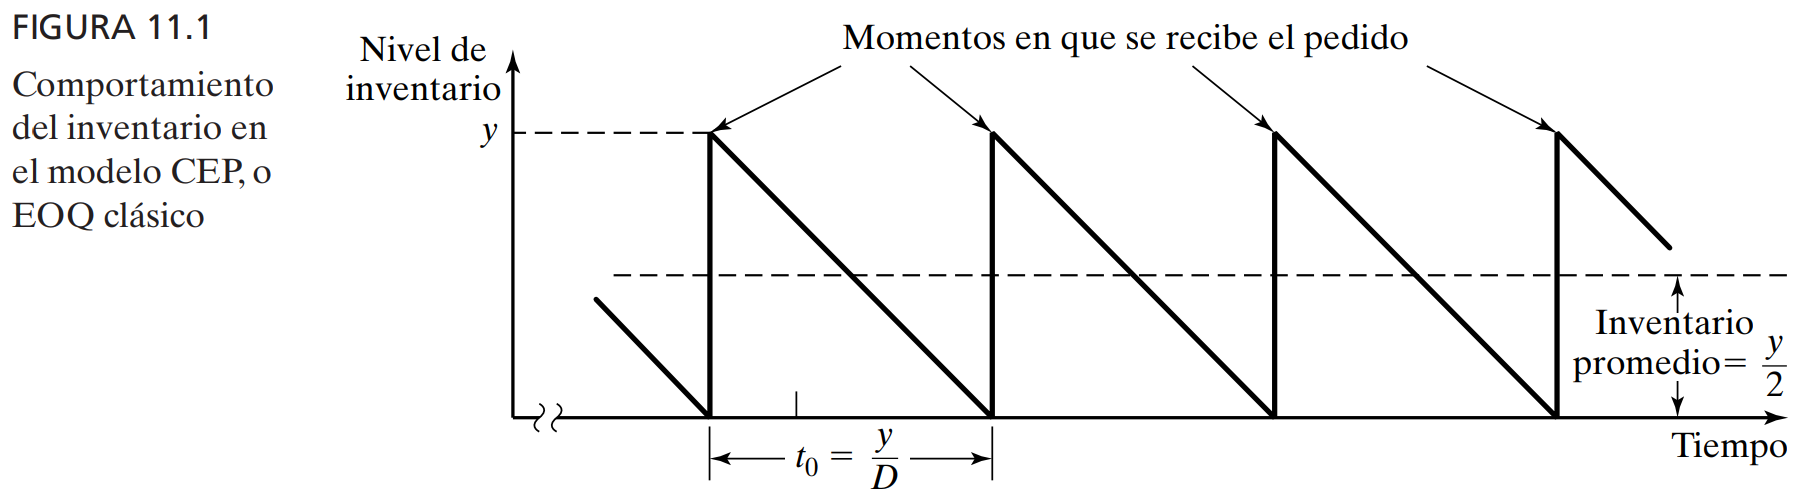

Se definirán, para el artículo i, i = 1, 2, ..., n:

$D_i:$ Tasa de demanda

$K_i:$ Costo de preparación

$h_i:$ Costo unitario de almacenamiento por unidad de tiempo

$y_i:$ Cantidad de pedido

$a_i:$ Área de almacenamiento necesaria por unidad de inventario

$A:$ Área máxima disponible de almacenamiento para los n artículos

In [1]:
D=[2,4,4]
K=[10,5,15]
h=[.3,.1,.2]
#y=[2,4,6]
a=[1,1,1]
A=25

Suponiendo que no hay faltantes, el modelo matemático que representa la situación del inventario es

$$\text{Minimizar TCU}(y_1,y_2,...,y_n)=\sum_{i=1}^{n}\Big(\frac{K_iD_i}{y_i}+\frac{h_iy_i}{2}\Big)$$

sujeta a $$\sum_{i=1}^{n}a_iy_i\leq A $$

$$\qquad y_i>0 \quad i=1,2,...,n$$

In [2]:
import numpy as np
from scipy.optimize import minimize

In [3]:
def tcu_objetivo(y_val, D, K, h):
    n = len(D)
    return sum((K[i] * D[i] / y_val[i] + (h[i] * y_val[i]) / 2) for i in range(n))

In [4]:
def rest_almacen(y_val, a, A):
    n = len(a)
# La restricción es suma(a_i * y_i) <= A, lo que significa A - suma(a_i * y_i) >= 0
    return A - sum(a[i] * y_val[i] for i in range(n))

Los pasos para resolver el problema son los siguientes.

**Paso 1.** Calcular los valores óptimos no restringidos de las cantidades de pedido con:

$$y_i^*=\sqrt{\frac{2K_iD_i}{h_i}}, i=1,2,...,n$$

In [5]:
def y_i(D,K,h):
    y_i=[]
    for i in range(len(D)):
        y_i.append(np.sqrt(2*K[i]*D[i]/(h[i])))
    return y_i

P=y_i(D,K,h)
print(P)

[np.float64(11.547005383792516), np.float64(20.0), np.float64(24.49489742783178)]


**Paso 2.** Comprobar si los valores óptimos no restringidos $y_i^*$
satisfacen la restricción de almacenamiento. Si la satisfacen, detenerse; la solución $y_i^*$., $i = 1, 2, ..., n$ es óptima.
En caso contrario seguir en el paso 3.

In [ ]:
def restriccion(a,yi,A):
  current_sum = np.sum([a[i]*yi[i] for i in range(len(a))])
  if current_sum > A:
    return print("No satisface restricción de almacenamiento, ya que: ",current_sum,">",A)
  else:
    return print("Satisface restricción de almacenamiento, ya que: ",current_sum,"<=",A)

res=restriccion(a,P,A)

No satisface restricción de almacenamiento, ya que:  56.0419028116243 > 25


**Paso 3.** Se debe satisfacer la restricción del almacenamiento en forma de ecuación. Usar el
método de los multiplicadores de Lagrange para determinar los valores restringidos
óptimos de las cantidades de pedido.

En el paso 3, la función de Lagrange se formula como sigue:

$$L(λ,y_1,y_2,...,y_n)=\sum_{i=1}^{n}\Big(\frac{K_iD_i}{y_i}+\frac{h_iy_i}{2}\Big)-λ\Big(\sum_{i=1}^{n}a_iy_i- A\Big)$$

donde $λ<0$ es el multiplicador de Lagrange.

Como la función de Lagrange es convexa, los valores óptimos de yi y se determinan con la siguiente condición necesaria:

$$\frac{∂L}{∂y_i}=-\frac{K_iD_i}{y_i}+\frac{h_i}{2}-λa_i=0$$

$$\frac{∂L}{∂λ}=-\sum_{i=1}^{n}a_iy_i+ A=0$$

La segunda ecuación indica que se debe satisfacer la restricción en forma de ecuación para el óptimo.De la primera ecuación,

$$y_i^*=\sqrt{\frac{2K_iD_i}{h_i-2λ^*a_i}}$$

La fórmula indica que $y_i^*$ depende del valor de $λ^*$

Para $λ^*=0$, $y_i^*$ da la solución sin restricción

In [7]:
def optimo(D, K, h, a, A):
    n = len(D)
   # Estimación inicial para y_i (por ejemplo, de la solución sin restricciones P)
    inicial_y = np.array(P)

    # Límites para y_i (y_i > 0)
    limite_y = [(1e-6, None) for _ in range(n)]

    # Definimos la restricción.
    restriccion = [{'type': 'ineq', 'fun': rest_almacen, 'args': (a, A)}]

    # Realizamos minimización
    resultado = minimize(tcu_objetivo, inicial_y, args=(D, K, h),
                      method='SLSQP', bounds=limite_y, constraints=restriccion)
    return resultado

op =optimo(D,K,h,a,A)
print(op)

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 13.623773559693312
           x: [ 6.340e+00  7.088e+00  1.157e+01]
         nit: 10
         jac: [-3.476e-01 -3.481e-01 -3.480e-01]
        nfev: 40
        njev: 10
 multipliers: [ 3.480e-01]


In [8]:
import pandas as pd

tabla_resultados = pd.DataFrame({
    'Variable': [f'y{i+1}' for i in range(len(op.x))],
    'Valor óptimo': op.x
})

tabla_resultados

,Variable,Valor óptimo
0,y1,6.339656
1,y2,7.087816
2,y3,11.572528
